In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Đọc dữ liệu
df = pd.read_csv('shopeep_koreantop_clothing_shop_data.csv')

# 5 dòng đầu
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


## Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.

In [3]:
# Tính số lượng shop gia nhập theo năm
shops_per_year = df.groupby(df['join_year'])['shopid'].count()

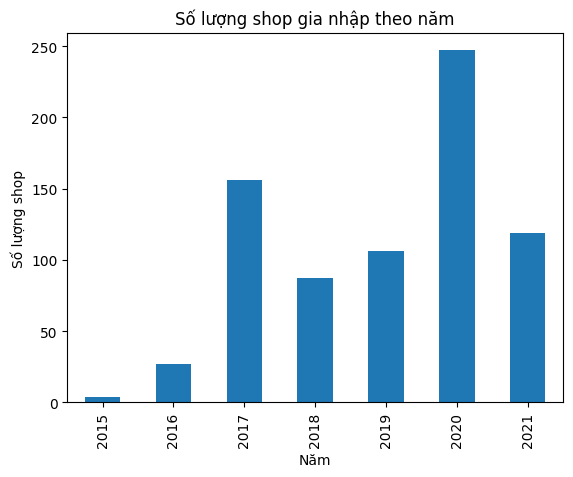

In [4]:
# Vẽ biểu đồ
shops_per_year.plot(kind = 'bar')
plt.title('Số lượng shop gia nhập theo năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng shop')

plt.show()

Nhìn chung số shop tham gia tăng dần. Chỉ giảm ở năm 2017 và 2020

## Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.

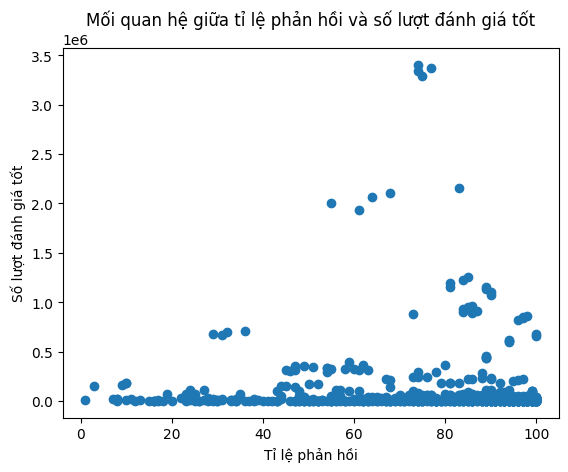

In [5]:
plt.scatter(df['response_rate'], df['rating_good'])
plt.title('Mối quan hệ giữa tỉ lệ phản hồi và số lượt đánh giá tốt')
plt.xlabel('Tỉ lệ phản hồi')
plt.ylabel('Số lượt đánh giá tốt')

plt.show()

Nhẫn xét:
- Tỉ lệ phản hồi cao không tỉ lệ thuận với số lượt đánh giá tốt nhưng có nhiều đánh giá tốt khi tỉ lệ phản hồi cao hơn

## Vẽ biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.

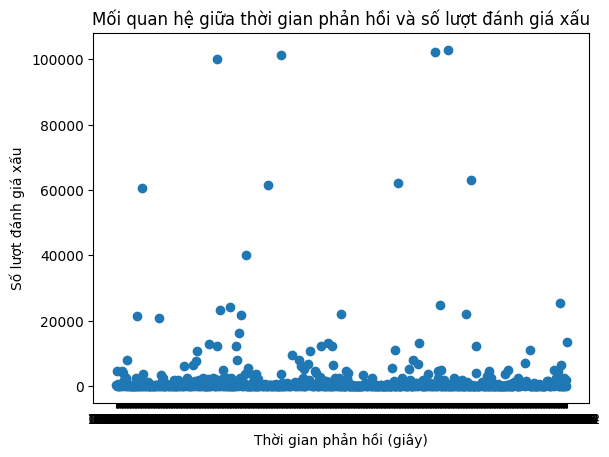

In [6]:
# Vẽ biểu đồ
plt.scatter(df['response_time'], df['rating_bad'])
plt.title('Mối quan hệ giữa thời gian phản hồi và số lượt đánh giá xấu')
plt.xlabel('Thời gian phản hồi (giây)')
plt.ylabel('Số lượt đánh giá xấu')

plt.show()

Không có mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.

## Vẽ biểu đồ thể hiện xu hướng của số lượng shop gia nhập theo thời gian.

In [7]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April':4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Chuyển đổi cột join_month từ chữ sang số
df['join_month'] = df['join_month'].map(month_mapping)


In [13]:
# Tạo cột mới 'join_date' từ join_year và join_month
df['join_date'] = pd.to_datetime({'year': df['join_year'],'month': df['join_month'], 'day': df['join_day']})
df['join_date'] = pd.to_datetime(df['join_date'])


In [14]:
shop_count_per_date = df.groupby('join_date')['shopid'].count()

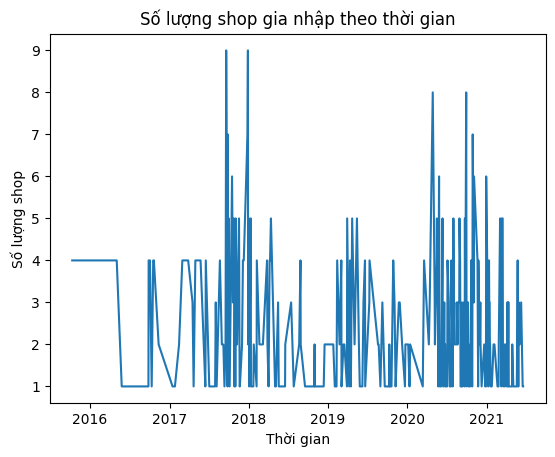

In [20]:
# vẽ biểu đồ đường
plt.plot(shop_count_per_date)
plt.title('Số lượng shop gia nhập theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng shop')

plt.show()


Có vẻ phần này mình làm sai rồi. Tiên chỉ giúp mình với

## Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình

Text(0, 0.5, 'Điểm')

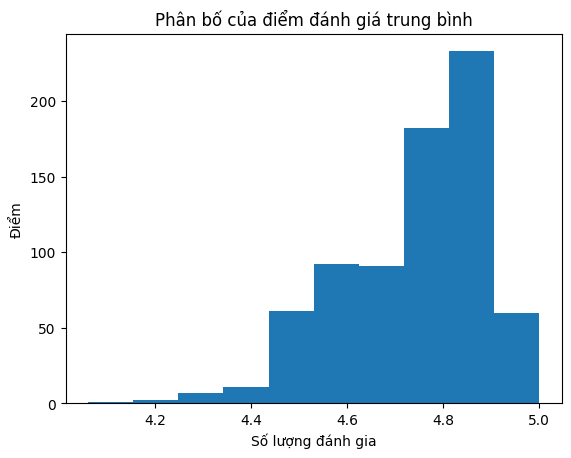

In [5]:
plt.hist(df['rating_star'])
plt.title('Phân bố của điểm đánh giá trung bình')
plt.xlabel('Số lượng đánh gia')
plt.ylabel('Điểm')